In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# ignore warning error
import warnings
warnings.filterwarnings('ignore')

# import standard libraries 
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame

# import visualization packages
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# import TensorFlow package
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import callbacks
from tensorflow import keras

# import parser
from dateutil.parser import parse

# spelling corrections
import textblob

# import reduce
from functools import reduce

# import bag count vectorizer function
from sklearn.feature_extraction.text import CountVectorizer

# import appropriate tokenize function
import nltk
from nltk import word_tokenize
nltk.download('punkt')

# import nltk 'stopwords' functions
nltk.download('stopwords')
from nltk.corpus import stopwords

# import EarlyStopping
import tensorflow
from keras.callbacks import ModelCheckpoint, EarlyStopping

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shabn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shabn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# import data and create column 'source' in each dataframe

amazon_df = pd.read_csv(r"C:\Users\shabn\Documents\WGU - MSDA\D213\sentiment labelled sentences\amazon_cells_labelled.txt", sep='\t', names=['review', 'score'])
amazon_df['source'] = 'Amazon'

yelp_df = pd.read_csv(r"C:\Users\shabn\Documents\WGU - MSDA\D213\sentiment labelled sentences\yelp_labelled.txt", sep='\t', names=['review', 'score'])
yelp_df['source'] = 'Yelp'

imdb_df = pd.read_csv(r"C:\Users\shabn\Documents\WGU - MSDA\D213\sentiment labelled sentences\imdb_labelled.txt", sep='\t', names=['review', 'score'])
imdb_df['source'] = 'IMDb'

In [4]:
amazon_df

,review,score,source
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon
...,...,...,...
995,The screen does get smudged easily because it ...,0,Amazon
996,What a piece of junk.. I lose more calls on th...,0,Amazon
997,Item Does Not Match Picture.,0,Amazon
998,The only thing that disappoint me is the infra...,0,Amazon


In [5]:
amazon_df.shape

(1000, 3)

In [6]:
amazon_df.isna().any()

review    False
score     False
source    False
dtype: bool

In [7]:
yelp_df

,review,score,source
0,Wow... Loved this place.,1,Yelp
1,Crust is not good.,0,Yelp
2,Not tasty and the texture was just nasty.,0,Yelp
3,Stopped by during the late May bank holiday of...,1,Yelp
4,The selection on the menu was great and so wer...,1,Yelp
...,...,...,...
995,I think food should have flavor and texture an...,0,Yelp
996,Appetite instantly gone.,0,Yelp
997,Overall I was not impressed and would not go b...,0,Yelp
998,"The whole experience was underwhelming, and I ...",0,Yelp


In [8]:
yelp_df.shape

(1000, 3)

In [9]:
yelp_df.isna().any()

review    False
score     False
source    False
dtype: bool

In [10]:
imdb_df

,review,score,source
0,"A very, very, very slow-moving, aimless movie ...",0,IMDb
1,Not sure who was more lost - the flat characte...,0,IMDb
2,Attempting artiness with black & white and cle...,0,IMDb
3,Very little music or anything to speak of.,0,IMDb
4,The best scene in the movie was when Gerardo i...,1,IMDb
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,IMDb
744,"Unfortunately, any virtue in this film's produ...",0,IMDb
745,"In a word, it is embarrassing.",0,IMDb
746,Exceptionally bad!,0,IMDb


In [11]:
imdb_df.shape

(748, 3)

In [12]:
imdb_df.isna().any()

review    False
score     False
source    False
dtype: bool

In [13]:
# we are expecting 1000 rows, let's look into the data
# we know that there is a new row when the score is given
# we will split the data after a numerical score

imdb = open(r"C:\Users\shabn\Documents\WGU - MSDA\D213\sentiment labelled sentences\imdb_labelled.txt").read()

    
texts, labels = zip(*(line.split('\t') for line in imdb.split('\n') if len(line.split('\t')) > 1))        

In [14]:
imdb_clean = pd.DataFrame()
imdb_clean['review'] = texts
imdb_clean['score'] = labels
imdb_clean['source'] = 'IMDb'

In [15]:
imdb_clean

,review,score,source
0,"A very, very, very slow-moving, aimless movie ...",0,IMDb
1,Not sure who was more lost - the flat characte...,0,IMDb
2,Attempting artiness with black & white and cle...,0,IMDb
3,Very little music or anything to speak of.,0,IMDb
4,The best scene in the movie was when Gerardo i...,1,IMDb
...,...,...,...
995,I just got bored watching Jessice Lange take h...,0,IMDb
996,"Unfortunately, any virtue in this film's produ...",0,IMDb
997,"In a word, it is embarrassing.",0,IMDb
998,Exceptionally bad!,0,IMDb


In [16]:
# combine the datasets into one

df = pd.concat([amazon_df, imdb_clean, yelp_df], ignore_index=True)
df


,review,score,source
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon
...,...,...,...
2995,I think food should have flavor and texture an...,0,Yelp
2996,Appetite instantly gone.,0,Yelp
2997,Overall I was not impressed and would not go b...,0,Yelp
2998,"The whole experience was underwhelming, and I ...",0,Yelp


<Axes: >

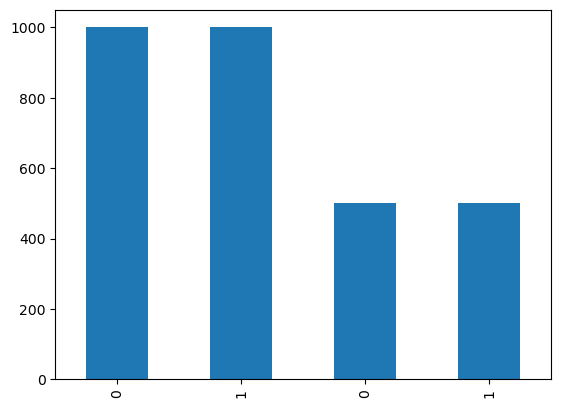

In [17]:
df['score'].value_counts().plot(kind='bar')

In [18]:
df.dtypes

review    object
score     object
source    object
dtype: object

In [19]:
df['score'] = df['score'].astype(int)

<Axes: >

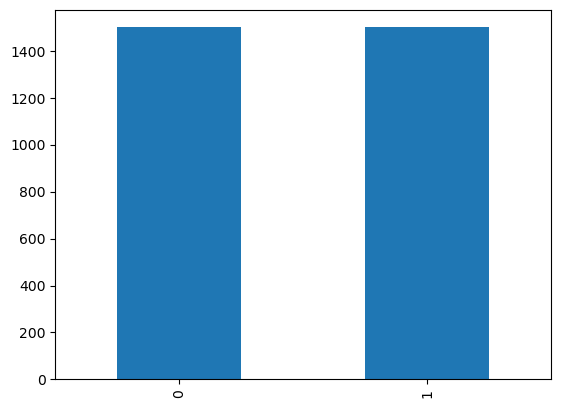

In [20]:
df['score'].value_counts().plot(kind='bar')

In [21]:
# the graph above looks correct, we are expecting 50/50 positive and negative sentiments

In [22]:
# make text lowecase, remove punctuation, remove punctuation, remove numbers
import re
import string

df_clean = df

def clean1(df_clean):
    df_clean = df_clean.lower() # make lowercase 
    df_clean = re.sub('\[.*?\]', '', df_clean) # remove text within square brackets
    df_clean = re.sub('[%s]' % re.escape(string.punctuation), '', df_clean) # removes punctuation
    df_clean = re.sub('\w*\d\w*', '', df_clean) # removes number
    return df_clean


round1 = lambda x: clean1(x)

In [23]:
df_clean = pd.DataFrame(df_clean.review.apply(round1))
df_clean

,review
0,so there is no way for me to plug it in here i...
1,good case excellent value
2,great for the jawbone
3,tied to charger for conversations lasting more...
4,the mic is great
...,...
2995,i think food should have flavor and texture an...
2996,appetite instantly gone
2997,overall i was not impressed and would not go back
2998,the whole experience was underwhelming and i t...


In [24]:
def clean2(df_clean):
    df_clean = re.sub('[‘’“”…]', '', df_clean)
    df_clean = re.sub('\n', '', df_clean)
    return df_clean

round2 = lambda x: clean2(x)

In [25]:
df_clean = pd.DataFrame(df_clean.review.apply(round2))
df_clean

,review
0,so there is no way for me to plug it in here i...
1,good case excellent value
2,great for the jawbone
3,tied to charger for conversations lasting more...
4,the mic is great
...,...
2995,i think food should have flavor and texture an...
2996,appetite instantly gone
2997,overall i was not impressed and would not go back
2998,the whole experience was underwhelming and i t...


In [26]:
df['cleaned_review'] = df_clean['review']
df

,review,score,source,cleaned_review
0,So there is no way for me to plug it in here i...,0,Amazon,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,Amazon,good case excellent value
2,Great for the jawbone.,1,Amazon,great for the jawbone
3,Tied to charger for conversations lasting more...,0,Amazon,tied to charger for conversations lasting more...
4,The mic is great.,1,Amazon,the mic is great
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,Yelp,i think food should have flavor and texture an...
2996,Appetite instantly gone.,0,Yelp,appetite instantly gone
2997,Overall I was not impressed and would not go b...,0,Yelp,overall i was not impressed and would not go back
2998,"The whole experience was underwhelming, and I ...",0,Yelp,the whole experience was underwhelming and i t...


In [27]:
review_len = df.review.str.len()
review_len

0        82
1        27
2        22
3        79
4        17
       ... 
2995     66
2996     24
2997     50
2998     91
2999    134
Name: review, Length: 3000, dtype: int64

In [28]:
l = [len(i) for i in df.review]
l = np.array(l)

print('Total number of words are: {}'.format(np.sum(l)))
print('Minimum number of words: {}'.format(l.min()))
print('Median number of words: {}'.format(np.median(l)))
print('Average number of words: {}'.format(l.mean()))
print('Maximum number of words: {}'.format(l.max()))

Total number of words are: 195827
Minimum number of words: 7
Median number of words: 55.5
Average number of words: 65.27566666666667
Maximum number of words: 479


In [29]:
def count_words(review):
    # Split reviews into words/tokens
    words = review.split()
    return len(words)


df['word_count'] = df['review'].apply(count_words)

df

,review,score,source,cleaned_review,word_count
0,So there is no way for me to plug it in here i...,0,Amazon,so there is no way for me to plug it in here i...,21
1,"Good case, Excellent value.",1,Amazon,good case excellent value,4
2,Great for the jawbone.,1,Amazon,great for the jawbone,4
3,Tied to charger for conversations lasting more...,0,Amazon,tied to charger for conversations lasting more...,11
4,The mic is great.,1,Amazon,the mic is great,4
...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,Yelp,i think food should have flavor and texture an...,12
2996,Appetite instantly gone.,0,Yelp,appetite instantly gone,3
2997,Overall I was not impressed and would not go b...,0,Yelp,overall i was not impressed and would not go back,10
2998,"The whole experience was underwhelming, and I ...",0,Yelp,the whole experience was underwhelming and i t...,16


In [30]:
df = df.reindex(
    columns=['score', 'word_count', 'review', 'cleaned_review'])
display(df)

,score,word_count,review,cleaned_review
0,0,21,So there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...
1,1,4,"Good case, Excellent value.",good case excellent value
2,1,4,Great for the jawbone.,great for the jawbone
3,0,11,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...
4,1,4,The mic is great.,the mic is great
...,...,...,...,...
2995,0,12,I think food should have flavor and texture an...,i think food should have flavor and texture an...
2996,0,3,Appetite instantly gone.,appetite instantly gone
2997,0,10,Overall I was not impressed and would not go b...,overall i was not impressed and would not go back
2998,0,16,"The whole experience was underwhelming, and I ...",the whole experience was underwhelming and i t...


In [31]:
def clean3(df):
    return re.sub('[^a-zA-Z]', ' ', df)


df['cleaned_review'] = df['cleaned_review'].apply(clean3)

In [32]:
df

,score,word_count,review,cleaned_review
0,0,21,So there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...
1,1,4,"Good case, Excellent value.",good case excellent value
2,1,4,Great for the jawbone.,great for the jawbone
3,0,11,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...
4,1,4,The mic is great.,the mic is great
...,...,...,...,...
2995,0,12,I think food should have flavor and texture an...,i think food should have flavor and texture an...
2996,0,3,Appetite instantly gone.,appetite instantly gone
2997,0,10,Overall I was not impressed and would not go b...,overall i was not impressed and would not go back
2998,0,16,"The whole experience was underwhelming, and I ...",the whole experience was underwhelming and i t...


In [33]:
# finally, we will eliminate stop words

stop = stopwords.words('english')
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
display(df)

,score,word_count,review,cleaned_review
0,0,21,So there is no way for me to plug it in here i...,way plug us unless go converter
1,1,4,"Good case, Excellent value.",good case excellent value
2,1,4,Great for the jawbone.,great jawbone
3,0,11,Tied to charger for conversations lasting more...,tied charger conversations lasting minutesmajo...
4,1,4,The mic is great.,mic great
...,...,...,...,...
2995,0,12,I think food should have flavor and texture an...,think food flavor texture lacking
2996,0,3,Appetite instantly gone.,appetite instantly gone
2997,0,10,Overall I was not impressed and would not go b...,overall impressed would go back
2998,0,16,"The whole experience was underwhelming, and I ...",whole experience underwhelming think well go n...


In [34]:
# so, we have removed punctuation, capitalization, punctuation, numbers, and stop words.

# let's now look at spelling errors

from textblob import Blobber, TextBlob

In [35]:
#df['cleaned_review'].apply(lambda x: str(tb(x).correct()))

In [36]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['cleaned_review'].apply(polarity)
df['subjectivity'] = df['cleaned_review'].apply(subjectivity)

df

,score,word_count,review,cleaned_review,polarity,subjectivity
0,0,21,So there is no way for me to plug it in here i...,way plug us unless go converter,0.000000,0.000000
1,1,4,"Good case, Excellent value.",good case excellent value,0.850000,0.800000
2,1,4,Great for the jawbone.,great jawbone,0.800000,0.750000
3,0,11,Tied to charger for conversations lasting more...,tied charger conversations lasting minutesmajo...,0.000000,0.000000
4,1,4,The mic is great.,mic great,0.800000,0.750000
...,...,...,...,...,...,...
2995,0,12,I think food should have flavor and texture an...,think food flavor texture lacking,0.000000,0.000000
2996,0,3,Appetite instantly gone.,appetite instantly gone,0.000000,0.666667
2997,0,10,Overall I was not impressed and would not go b...,overall impressed would go back,0.333333,0.333333
2998,0,16,"The whole experience was underwhelming, and I ...",whole experience underwhelming think well go n...,0.100000,0.200000


In [37]:
positve = df[df.score == 1]['cleaned_review']
negative = df[df.score == 0]['cleaned_review']
split_df = [positve, negative]

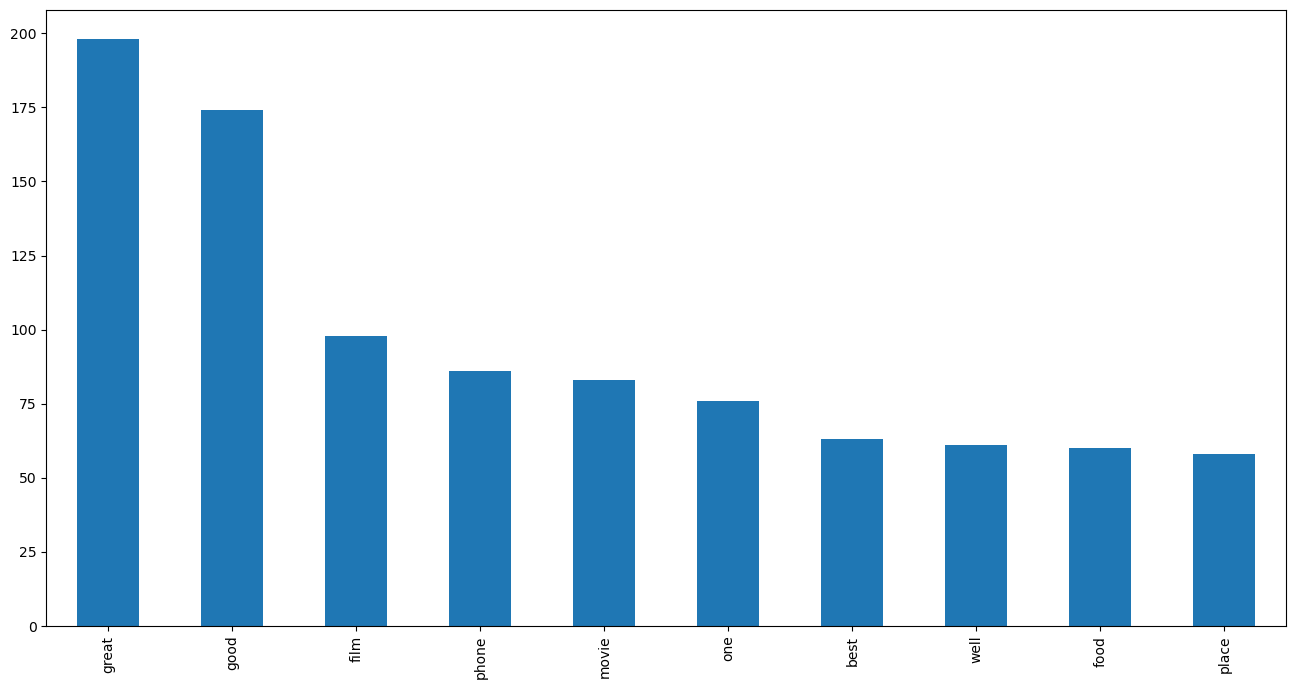

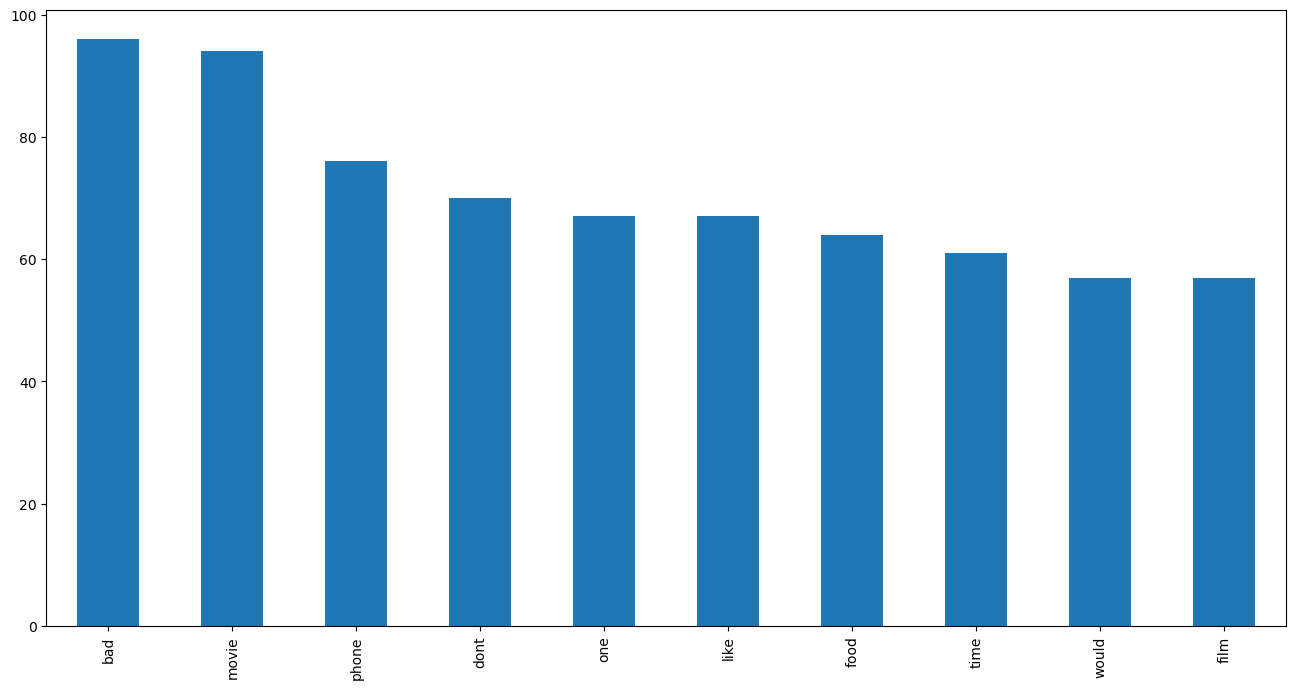

In [38]:
for item in range(2):
    plt.figure(figsize=(16, 8))
    pd.Series(' '.join([
        i for i in split_df[item]
    ]).split()).value_counts().head(10).plot(kind='bar')

In [39]:
unique = set(df['review'].str.replace('[^a-zA-Z]', '').str.lower().str.split(' ').sum())

In [40]:
print('There are ' + str(len(unique)) + ' unique words in the merged DataFrame.')

There are 2969 unique words in the merged DataFrame.


In [41]:
# split data into test and train 80/20
from sklearn.model_selection import train_test_split

X = df['cleaned_review']
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 24)

# View data splits size
print('Training size:', X_train.shape[0])
print('Testing size:', X_test.shape[0])

Training size: 2400
Testing size: 600


In [42]:
# tokenization

tokenizer = Tokenizer(oov_token = '<OOV>')
split = round(len(df) * 0.8)

training_reviews = df['cleaned_review'][:split]
training_score = df['score'][:split]

test_reviews = df['cleaned_review'][split:]
test_score = df['score'][split:]

In [43]:
training_sentences = []
training_labels = []
test_sentences = []
test_labels = []

In [44]:
for row in training_reviews:
 training_sentences.append(str(row))

for row in training_score:
 training_labels.append(row)

for row in test_reviews:
 test_sentences.append(str(row))

for row in test_score:
 test_labels.append(row)

In [45]:
word_amount = []

for sentence in df.review:
    word_amount.append(len(sentence.split(' ')))
    
max_sequence_len = np.max(word_amount)
print(f"Max sequence length: {max_sequence_len}")

Max sequence length: 73


In [46]:
vocab_size = 4611
embedding_dim = 8
max_length = 73
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Fit the tokenizer - train set
tokenizer.fit_on_texts(training_sentences)

# Word index
word_index = tokenizer.word_index

print('The vocab has',str(len(word_index)),'words.')

The vocab has 4611 words.


In [47]:
embedding_len = round(vocab_size**.25)
print(f"Padding word length: {embedding_len}")

Padding word length: 8


In [48]:
# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Fit the tokenizer - train set
tokenizer.fit_on_texts(training_sentences)

# Word index
word_index = tokenizer.word_index

print('The vocab has',str(len(word_index)),'words.')

The vocab has 4611 words.


In [49]:
# lets set sequences and padding
sequences = tokenizer.texts_to_sequences(training_sentences)

# Setting padding
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
test_sentences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sentences, maxlen=max_length)

In [50]:
# lets Pad the sentences
print("\nTraining sequences:\n", training_sentences)


Training sequences:
 ['way plug us unless go converter', 'good case excellent value', 'great jawbone', 'tied charger conversations lasting minutesmajor problems', 'mic great', 'jiggle plug get line right get decent volume', 'several dozen several hundred contacts imagine fun sending one one', 'razr owneryou must', 'needless say wasted money', 'waste money time', 'sound quality great', 'impressed going original battery extended battery', 'two seperated mere ft started notice excessive static garbled sound headset', 'good quality though', 'design odd ear clip comfortable', 'highly recommend one blue tooth phone', 'advise everyone fooled', 'far good', 'works great', 'clicks place way makes wonder long mechanism would last', 'went motorolas website followed directions could get pair', 'bought use kindle fire absolutely loved', 'commercials misleading', 'yet run new battery two bars thats three days without charging', 'bought mother problem battery', 'great pocket pc phone combination', 'i

In [51]:
df.to_csv("df_prepared_sa.csv", index=False)

In [52]:
np.set_printoptions(threshold=np.inf)

test_pad = np.array(test_padded[10])

test_pad

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,   13,   81,  150,   15,    1, 4492])

In [53]:
# lets create model with tensofFlow
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), 
    tf.keras.layers.GlobalAveragePooling1D(), 
    tf.keras.layers.Dense(10, activation='relu'), 
    tf.keras.layers.Dense(6, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [54]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 73, 8)             36888     
                                                                 
 global_average_pooling1d (  (None, 8)                 0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 37051 (144.73 KB)
Trainable params: 37051 (144.73 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [55]:
train_labels_final = np.array(training_labels)
test_labels_final = np.array(test_labels)

In [56]:
print("Training Data Shape:", padded.shape)
print("Training Labels Shape:", train_labels_final.shape)

print("Test Data Shape:", test_padded.shape)
print("Test Labels Shape:", test_labels_final.shape)

Training Data Shape: (2400, 73)
Training Labels Shape: (2400,)
Test Data Shape: (600, 73)
Test Labels Shape: (600,)


In [57]:
# lets fit the model for 20 epochs
epochs_num = 20

early_stop = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

history = model.fit(padded, train_labels_final, epochs= epochs_num,
                   validation_data=(test_padded, test_labels_final),callbacks = [early_stop])

Epoch 1/20
75/75 [==============================] - 1s 5ms/step - loss: 0.6931 - accuracy: 0.5096 - val_loss: 0.6942 - val_accuracy: 0.4617
Epoch 2/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5104 - val_loss: 0.6962 - val_accuracy: 0.4617
Epoch 3/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5529 - val_loss: 0.6920 - val_accuracy: 0.4617
Epoch 4/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.7342 - val_loss: 0.6912 - val_accuracy: 0.4617
Epoch 5/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6388 - val_loss: 0.6730 - val_accuracy: 0.6267
Epoch 6/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6218 - accuracy: 0.8546 - val_loss: 0.6372 - val_accuracy: 0.7500
Epoch 7/20
75/75 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.8988 - val_loss: 0.5821 - val_accuracy: 0.7717
Epoch 8/20
75/75 [==

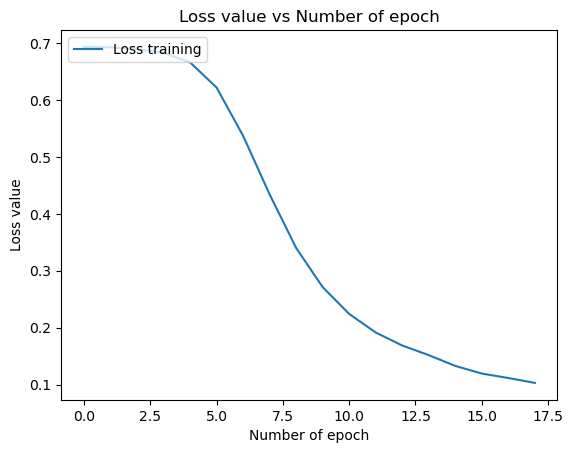

In [63]:
plt.plot(history.history['loss'], label='Loss training')
plt.title('Loss value vs Number of epoch')
plt.ylabel('Loss value')
plt.xlabel('Number of epoch')
plt.legend(loc="upper left")

### Part III: Network Architecture

**C. Describe the type of network used by doing the following:**

**1. Provide the output of the model summary of the function from TensorFlow.**

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 73, 8)             36888     
                                                                 
 global_average_pooling1d (  (None, 8)                 0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 37051 (144.73 KB)
Trainable params: 37051 (144.73 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

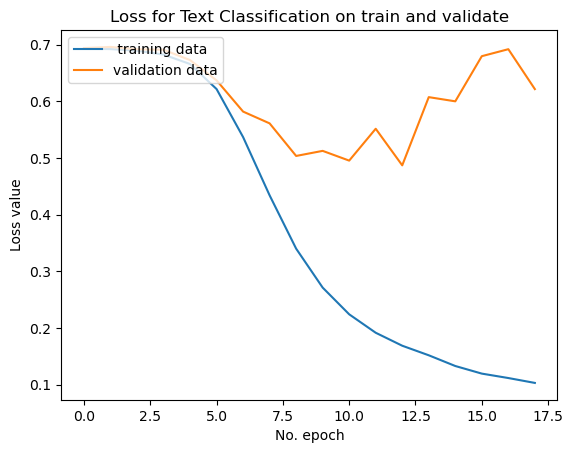

In [60]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification on train and validate')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

<Figure size 640x480 with 0 Axes>

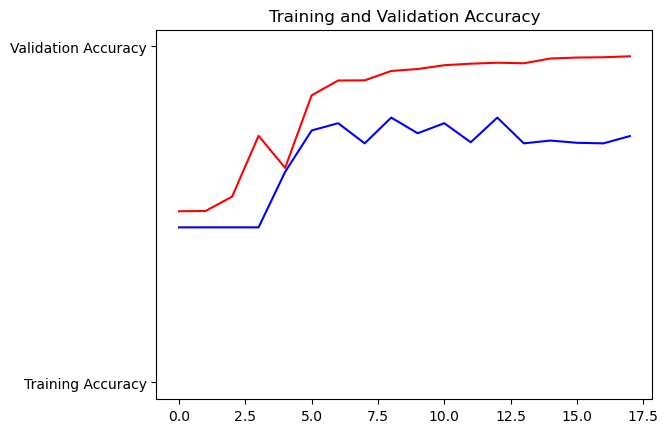

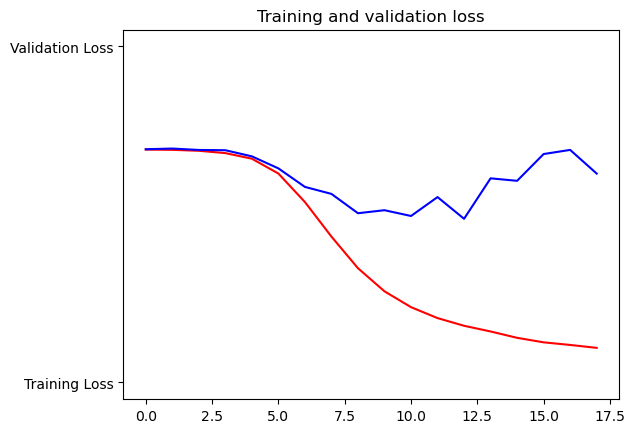

<Figure size 640x480 with 0 Axes>

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [65]:
model.save('Model_D212_T2.h5')